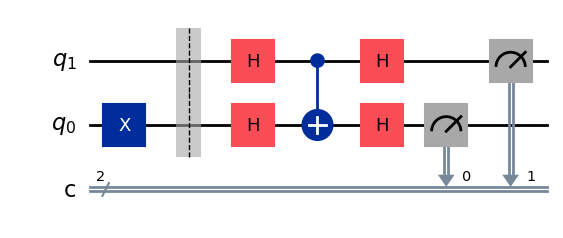

{'11': 100}


In [1]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator

q =  QuantumRegister(2,"q") # quantum register with 2 qubits
c = ClassicalRegister(2,"c") # classical register with 2 bits

qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers

# the up qubit is in |0>

# set the down qubit to |1>
qc.x(q[0]) # apply x-gate (NOT operator)

qc.barrier()

# apply Hadamard to both qubits.
qc.h(q[0])
qc.h(q[1])

# apply CNOT operator, where the controller qubit is the up qubit and the target qubit is the down qubit.
qc.cx(1,0)

# apply Hadamard to both qubits.
qc.h(q[0])
qc.h(q[1])

# measure both qubits
qc.measure(q,c)

# draw the circuit in Qiskit reading order
display(qc.draw(output='mpl',reverse_bits=True))

# execute the circuit 100 times in the local simulator
job = AerSimulator().run(qc,shots=100)
counts = job.result().get_counts(qc)
print(counts)

# Kuantum Devresinin Adım Adım İncelenmesi

### Başlangıç Durumu:

- **q[0]** (aşağı qubit): Başlangıçta **|0⟩** durumundadır. **qc.x(q[0])** ile X kapısı uygulanarak **|1⟩** durumuna getirilir.
- **q[1]** (yukarı qubit): Başlangıçta **|0⟩** durumundadır.

**Toplam Durum:**  
\[
|01⟩
\]

### Hadamard Kapıları:

- **q[0]** (|1⟩ durumu):
  Hadamard uygulandığında:
  \[
  H|1⟩ = \frac{1}{\sqrt{2}}(|0⟩ - |1⟩)
  \]

- **q[1]** (|0⟩ durumu):
  Hadamard uygulandığında:
  \[
  H|0⟩ = \frac{1}{\sqrt{2}}(|0⟩ + |1⟩)
  \]

**Toplam Durum:**  
\[
\frac{1}{\sqrt{2}}(|00⟩ + |01⟩ - |10⟩ - |11⟩)
\]

### CNOT Kapısı (qc.cx(1, 0)):

- **Kontrol Qubit:** q[1] (yukarı qubit)
- **Hedef Qubit:** q[0] (aşağı qubit)

**İşlev:**  
Kontrol qubit **|1⟩** olduğunda, hedef qubit'in durumu tersine çevrilir. Ancak q[1] süperpozisyonda olduğu için, CNOT kapısı uygulandığında durum şu şekilde değişir:

\[
\frac{1}{\sqrt{2}}(|00⟩ + |01⟩ - |11⟩ - |10⟩)
\]

### Tekrar Hadamard Kapıları:

- **q[0]** ve **q[1]** qubit'lerine tekrar Hadamard kapıları uygulanır. Bu işlem süperpozisyonu temel duruma dönüştürür:
  - **q[0] → |1⟩**
  - **q[1] → |1⟩**

**Toplam Durum:**  
\[
|11⟩
\]

### Ölçüm:

Her iki qubit de **|1⟩** durumunda olduğu için, tüm ölçümler **"11"** sonucunu verir.
